In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

passengers = pd.read_csv("https://exampledata.netlify.app/titanic.csv")

passengers['age'].fillna(passengers['age'].mean(), inplace=True)

passengers.drop(['name','cabin','ticket'], axis=1, inplace=True)
passengers = pd.get_dummies(passengers)

passengers

,id,survived,class,age,sibSp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0,1,0,0,1
887,888,1,1,19.000000,0,0,30.0000,1,0,0,0,1
888,889,0,3,29.699118,1,2,23.4500,1,0,0,0,1
889,890,1,1,26.000000,0,0,30.0000,0,1,1,0,0


In [51]:
from sklearn.linear_model import LogisticRegression

<AxesSubplot:xlabel='class', ylabel='age'>

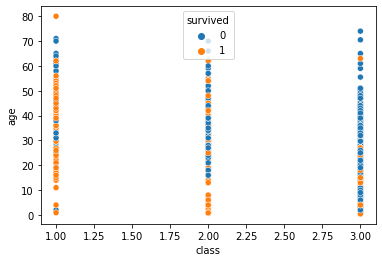

In [123]:
sns.scatterplot(x='class', y='age', data=passengers, hue='survived')

0.8033898305084746

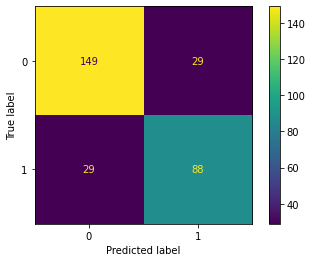

In [124]:
clf = LogisticRegression()

X, y = passengers[['class','age', 'sex_female']], passengers['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)

clf.fit(X_train, y_train)

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test)
clf.score(X_test, y_test)

#clf.coef_